# DB 연결 및 데이터 테스트

이 노트북은 Flask 애플리케이션의 데이터베이스에 연결하고 `RealEstateTransaction` 및 `PublicParking` 모델에서 데이터를 가져옵니다.

In [27]:
from utils import setup_db_context
import pandas as pd
import numpy as np
from sqlalchemy import select

# DB 컨텍스트 설정
app, db = setup_db_context()

from myapp.models import RealEstateTransaction, PublicParking

데이터베이스 연결 및 앱 컨텍스트 푸시 완료.


## 1. 부동산 실거래가 (Real Estate Transactions)

In [28]:
# SQLAlchemy를 사용하여 데이터 가져오기
transactions = RealEstateTransaction.query.limit(5).all()
print(f"가져온 거래 수: {len(transactions)}")

# DataFrame으로 변환
stmt = select(RealEstateTransaction)
df_ret = pd.read_sql(stmt, db.session.connection())

print(f"총 레코드 수: {len(df_ret)}")
df_ret.head()

가져온 거래 수: 5
총 레코드 수: 235671


,ret_id,reception_year,district_code,district_name,legal_dong_code,legal_dong_name,jibun_type,jibun_type_name,main_number,sub_number,...,amount,building_area,land_area,floor,right_type,cancel_date,construction_year,building_use,declaration_type,broker_district_name
0,2,2025,11320,도봉구,10600,방학동,1,대지,0638,0010,...,14800,37.66,16.0,4,,,1994.0,연립다세대,중개거래,서울 도봉구
1,3,2025,11380,은평구,10800,역촌동,,,,,...,39620,74.08,182.0,,,,1972.0,단독다가구,직거래,
2,4,2025,11500,강서구,10200,등촌동,1,대지,0628,0013,...,10300,26.16,35.71,6,,,1999.0,오피스텔,중개거래,서울 강서구
3,5,2025,11620,관악구,10200,신림동,1,대지,1639,0051,...,12700,18.70,26.16,8,,,2014.0,오피스텔,중개거래,서울 관악구
4,6,2025,11530,구로구,10600,고척동,1,대지,0339,0000,...,84000,59.89,0.0,9,,,2009.0,아파트,중개거래,"서울 구로구, 서울 양천구"


## 2. 공영주차장 (Public Parkings)

In [29]:
# SQLAlchemy를 사용하여 데이터 가져오기
parkings = PublicParking.query.limit(5).all()
print(f"가져온 주차장 레코드 수: {len(parkings)}")

# DataFrame으로 변환
stmt = select(PublicParking)
df_pp = pd.read_sql(stmt, db.session.connection())

print(f"총 레코드 수: {len(df_pp)}")
df_pp.head()

가져온 주차장 레코드 수: 5
총 레코드 수: 1875


,pp_id,parking_code,parking_name,address,parking_type,parking_type_name,operation_type,operation_type_name,phone_number,parking_status_available,...,bus_basic_time_min,bus_add_rate,bus_add_time_min,day_max_rate,lat,lng,share_parking_company_name,share_parking,share_parking_company_link,share_parking_etc
0,1,171721,세종로 공영주차장(시),종로구 세종로 80-1,NW,노외 주차장,1,시간제 주차장,02-2290-6566,1,...,0,0,0,30900,37.573403,126.975884,,N,,
1,2,171730,종묘주차장 공영주차장(시),종로구 훈정동 2-0,NW,노외 주차장,1,시간제 주차장,02-2290-6166,1,...,0,0,0,28800,37.571504,126.994969,,N,,
2,3,171900,훈련원공원 공영주차장(시),중구 을지로5가 40-3,NW,노외 주차장,1,시간제 주차장,02-3405-4597,1,...,0,0,0,39600,37.567400,127.003521,,N,,
3,4,172051,한강진역 공영주차장(시),용산구 한남동 728-27,NW,노외 주차장,1,시간제 주차장,02-795-6406,1,...,0,0,0,28800,37.539522,127.002580,,N,,
4,5,172065,용산주차빌딩 공영주차장(시),용산구 한강로2가 12-9,NW,노외 주차장,1,시간제 주차장,02-2290-6014,1,...,0,0,0,21600,37.534364,126.965418,,N,,


## 3. 상관관계 분석 (Correlation Analysis)

**히트맵 (Correlation Heatmap)**: 평당가, 거래량, 공영주차면수, 주차포화도 4개 변수 간의 피어슨 상관계수 시각화.

> **💡 주석: 피어슨 상관계수 (Pearson Correlation Coefficient, $r$)**
>
> 두 변수가 서로 얼마나 강하게 연결되어 있는지 보여주는 수치입니다 (-1 ~ 1).
> * **1에 가까움**: 주차장이 늘어나면 집값이 **확실히 오른다**. (양의 상관관계)
> * **0**: 둘은 아무 상관이 없다.
> * **-1에 가까움**: 주차장이 늘어나면 오히려 집값이 **떨어진다**. (음의 상관관계, 예: 혐오시설)

병합된 데이터 (거래 및 주차 정보가 모두 있는 동): 93


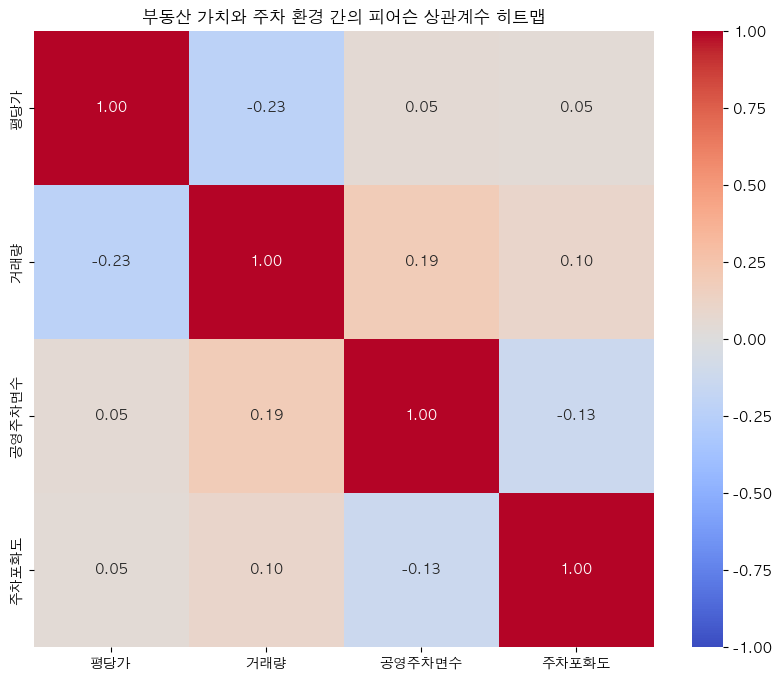

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 전처리

# 부동산: 평당가 계산
# SettingWithCopyWarning 방지를 위한 명시적 복사
df_ret = df_ret.copy()
df_ret['amount'] = pd.to_numeric(df_ret['amount'], errors='coerce')
df_ret['building_area'] = pd.to_numeric(df_ret['building_area'], errors='coerce')
df_ret['price_per_sqm'] = df_ret['amount'] / df_ret['building_area']

# 법정동별 그룹화 (자치구 + 법정동)
dong_ret_stats = df_ret.groupby(['district_name', 'legal_dong_name']).agg(
    avg_price_per_sqm=('price_per_sqm', 'mean'),
    transaction_volume=('ret_id', 'count')
).reset_index()

# 공영주차장: 동 정보 추출, 주차면수 및 포화도 계산
df_pp = df_pp.copy()

def extract_dong(address):
    if pd.isna(address): return None
    parts = address.split()
    # '자치구 동이름 ...' 형식 가정 (예: '종로구 세종로')
    if len(parts) >= 2:
        return parts[1]
    return None

def extract_district(address):
    if pd.isna(address): return None
    parts = address.split()
    if len(parts) >= 1:
        return parts[0]
    return None

df_pp['legal_dong_name'] = df_pp['address'].apply(extract_dong)
df_pp['district_name'] = df_pp['address'].apply(extract_district)

df_pp['total_spaces'] = pd.to_numeric(df_pp['total_spaces'], errors='coerce')
df_pp['current_parking'] = pd.to_numeric(df_pp['current_parking'], errors='coerce')
df_pp['saturation'] = df_pp['current_parking'] / df_pp['total_spaces']
# 포화도 계산 시 inf/nan 값을 0으로 대체
df_pp['saturation'] = df_pp['saturation'].replace([np.inf, -np.inf], 0).fillna(0)

dong_pp_stats = df_pp.groupby(['district_name', 'legal_dong_name']).agg(
    total_parking_spots=('total_spaces', 'sum'),
    avg_parking_saturation=('saturation', 'mean')
).reset_index()

# 2. 데이터 병합
merged_df = pd.merge(dong_ret_stats, dong_pp_stats, on=['district_name', 'legal_dong_name'], how='inner')
print(f"병합된 데이터 (거래 및 주차 정보가 모두 있는 동): {len(merged_df)}")

# 3. 상관관계 분석
# Mac 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

corr_vars = ['avg_price_per_sqm', 'transaction_volume', 'total_parking_spots', 'avg_parking_saturation']
corr_matrix = merged_df[corr_vars].corr(method='pearson')

corr_col_map = {
    'avg_price_per_sqm': '평당가',
    'transaction_volume': '거래량',
    'total_parking_spots': '공영주차면수',
    'avg_parking_saturation': '주차포화도'
}
corr_matrix_display = corr_matrix.rename(columns=corr_col_map, index=corr_col_map)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_display, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('부동산 가치와 주차 환경 간의 피어슨 상관계수 히트맵')
plt.show()

### 1. 주요 지표 분석

*   **평당가 vs 거래량 (-0.23)**
    *   약한 음의 상관관계가 나타납니다. 이는 평당 가격이 매우 높은 지역(고가 지역)일수록 거래 빈도는 오히려 다소 낮아지는 경향이 있음을 시사합니다.
*   **평당가 vs 공영주차면수 (0.05)**
    *   상관계수가 0에 매우 가깝습니다. 이는 단순히 '공영주차장의 개수나 면수'가 평당 가격 결정에 직접적인 원인이 되지는 않는다는 것을 의미합니다. (고가 지역은 이미 사설 주차 인프라가 잘 되어 있거나, 공영주차장 유무와 상관없이 입지 조건이 가격을 주도하기 때문으로 해석됩니다.)
*   **거래량 vs 공영주차면수 (0.19)**
    *   약한 양의 상관관계가 있습니다. 공영주차 인프라가 어느 정도 갖춰진 지역에서 부동산 거래가 조금 더 활발하게 일어날 가능성이 있음을 보여줍니다.
*   **공영주차면수 vs 주차포화도 (-0.13)**
    *   주차면수가 많을수록 포화도는 낮아지는 경향이 있지만, 그 정도가 매우 크지는 않습니다. 이는 주차면 공급이 늘어나도 그만큼 수요가 함께 존재하는 지역이 많음을 의미합니다.

### 2. 종합 해석 및 인사이트

*   **독립적 변수로서의 주차 환경**: 현재 데이터상으로 평당가와 주차 지표(면수, 포화도) 간의 직접적인 상관관계는 매우 낮게 나타납니다. 즉, 주차장이 많다고 해서 집값이 비싼 것은 아니며, 집값이 비싸다고 해서 반드시 주차 포화도가 낮은 것도 아닙니다.
*   **PAI(주차 접근성 지수)의 필요성**: 단순히 면수(Count)로만 비교하면 위와 같이 상관관계가 낮게 나올 수 있습니다. 기획서에서 언급하신 **PAI(거래 건수 대비 주차 면수 비율)**와 같이 가공된 파생 변수를 적용하여 다시 분석한다면, 더 유의미한 수치가 나올 가능성이 높습니다.
*   **지역별 편차 고려**: 서울 전체를 하나로 묶기보다, 주차난이 심각한 **'빌라/다세대 밀집 지역'**과 주차 공간이 확보된 **'신축 아파트 단지'**를 분리하여 분석하면 주차 환경이 가격에 미치는 민감도를 더 정확히 파악할 수 있을 것입니다.

### 3. 추천 엔진 반영 전략

*   **투자 관점**: "주차 환경과 가격의 상관관계가 낮다"는 것은 주차 환경이 매우 좋음에도 가격이 아직 낮은 '저평가 지역'이 존재할 확률이 높다는 뜻입니다. 이를 엔진에서 **'주차 가성비 점수'**로 환산하여 추천할 수 있습니다.
*   **가중치 조정**: 사용자가 '주차'를 중요하게 생각한다면 ($w1$ 증가), 상관관계가 낮더라도 개별 매물의 PAI 점수를 최우선으로 필터링하도록 설계해야 합니다.

## 4. 주차 접근성에 따른 가격 분포 분석 (Box Plot Analysis)

**박스 플롯 (Box Plot)**:
* **X축**: 주차 접근성 등급 (상/중/하) - 법정동별 공영주차면수 기준
* **Y축**: 건물 유형별 평당가 분포
* **목적**: 주차 등급이 높을수록 평당가 중위값이 유의미하게 상승하는지 확인.

> **💡 주석: 박스 플롯 (Box Plot)**
>
> 데이터의 분포를 성냥갑 모양의 상자로 보여줍니다.
> * 상자의 가운데 선은 **중간값(Median)**이며, 상자의 크기는 데이터가 얼마나 퍼져있는지를 의미합니다.
> * 주차 등급 '상' 그룹의 상자가 '하' 그룹보다 확실히 높은 곳에 위치한다면, **"주차가 좋으면 집값이 비싸다"**는 것이 증명됩니다.

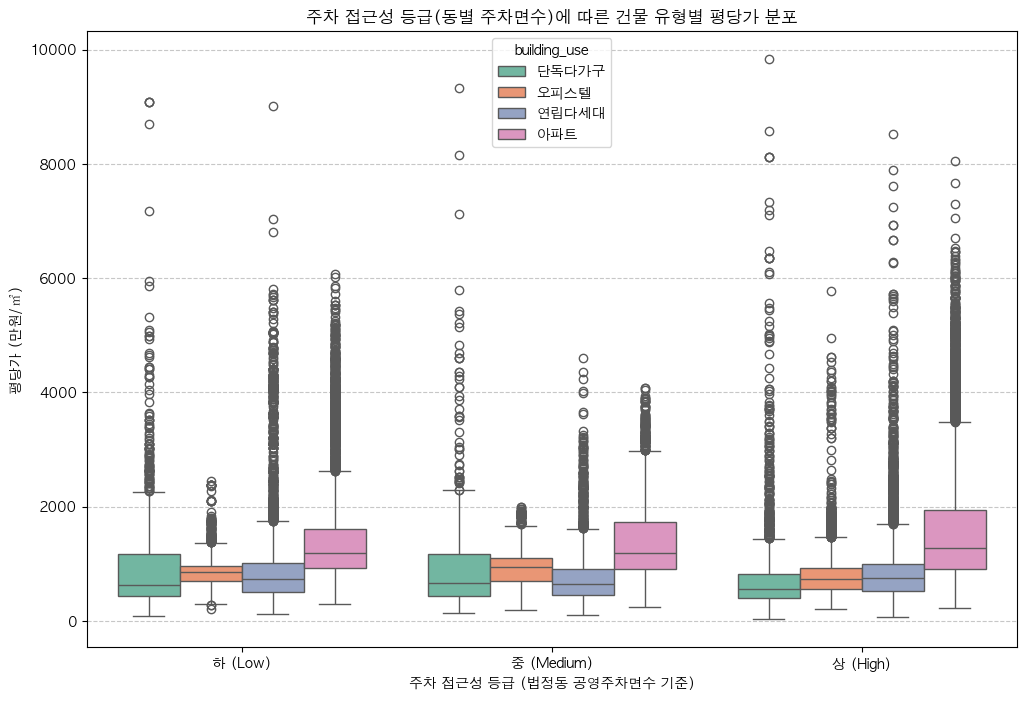

In [31]:
# 1. 주차 통계 데이터를 거래 데이터와 다시 병합
# 개별 거래 가격과 건물 유형이 필요하지만, 동별 주차 통계와 연결되어야 함
# 'dong_pp_stats' was created in the previous step

# 거래 데이터(df_ret)와 동별 주차 정보(dong_pp_stats) 결합
# 참고: df_ret에는 이전 단계에서 계산된 'price_per_sqm'이 이미 있음
df_merged_all = pd.merge(df_ret, dong_pp_stats, on=['district_name', 'legal_dong_name'], how='left')

# 2. 주차 접근성 등급 산출 (분위수 기반)
# '총 주차면수'를 기준으로 동을 상(상위 33%), 중, 하(하위 33%)로 분류
# 참고: 이 등급은 동 기준임.

# 고유 동 통계에 qcut을 사용하여 임계값을 결정한 후 매핑
# 거래량이 많은 동의 편향을 피하기 위해 동 분포를 기준으로 임계값 정의
parking_thresholds = dong_pp_stats['total_parking_spots'].quantile([0.33, 0.66])
low_thresh = parking_thresholds[0.33]
high_thresh = parking_thresholds[0.66]

def assign_grade(spots):
    if pd.isna(spots): return 'Unknown'
    if spots <= low_thresh: return '하 (Low)'
    elif spots <= high_thresh: return '중 (Medium)'
    else: return '상 (High)'

df_merged_all['parking_grade'] = df_merged_all['total_parking_spots'].apply(assign_grade)

# 주차 정보가 누락된 행 제외
df_box_plot = df_merged_all[df_merged_all['parking_grade'] != 'Unknown'].copy()

# 그래프 가독성을 위해 주요 건물 유형 필터링
target_types = ['아파트', '연립다세대', '단독다가구', '오피스텔']
df_box_plot = df_box_plot[df_box_plot['building_use'].isin(target_types)]

# 3. 시각화
plt.figure(figsize=(12, 8))

# X축 순서 설정
order_list = ['하 (Low)', '중 (Medium)', '상 (High)']

sns.boxplot(x='parking_grade', y='price_per_sqm', hue='building_use', 
            data=df_box_plot, order=order_list, palette='Set2')

plt.title('주차 접근성 등급(동별 주차면수)에 따른 건물 유형별 평당가 분포')
plt.xlabel('주차 접근성 등급 (법정동 공영주차면수 기준)')
plt.ylabel('평당가 (만원/㎡)')

# 주요 분포에 집중하기 위해 Y축 제한 (필요 시 극단적인 이상치 제거)
# plt.ylim(0, 3000) # Optional: Adjust based on data range

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

### 1. 건물 유형별 가격 수준 (Building Use)
모든 주차 접근성 등급(하, 중, 상)에서 공통적으로 나타나는 특징입니다.

*   **아파트 (분홍색):** 타 건물 유형 대비 평당가 중앙값(Median) 및 전체적인 가격대가 가장 높게 형성되어 있습니다.
*   **오피스텔 (주황색):** 아파트 다음으로 높은 가격대를 보이며, 가격 분포가 상대적으로 촘촘합니다.
*   **단독다가구 (초록색) & 연립다세대 (보라색):** 대체로 낮은 평당가에 분포하며, 두 유형 간 가격 차이는 미미합니다.

### 2. 주차 접근성 등급에 따른 변화
주차 접근성이 '하'에서 '상'으로 개선됨에 따른 변화입니다.

*   **가격 상승세:** 주차 접근성 등급이 높아질수록 아파트와 오피스텔의 평당가 중앙값이 소폭 상승하는 경향을 보입니다.
*   **격차 심화:** 인프라가 우수한 지역일수록 아파트 가격의 상단 범위(Outliers)가 넓어지며, 고가 매물이 집중되는 현상이 나타납니다.

### 3. 이상치 (Outliers) 분석
그래프 상단의 극단적 가격대 분석입니다.

*   **아파트:** 모든 등급에서 압도적인 이상치가 존재합니다. 이는 주차 여건 외에도 브랜드 가치나 특정 입지에 따른 초고가 매물(평당 8,000~10,000만 원)의 영향입니다.
*   **단독/연립/다세대:** 주차 등급 '상' 지역에서 평당가가 급격히 높은 매물들이 발견되며, 이는 도심 역세권이나 고급 주택가의 영향으로 판단됩니다.

### 4. 종합 요약
*   주차 편의성은 건물 가치에 긍정적인 영향을 미치나, 그 영향력은 **아파트**에서 가장 뚜렷하게 나타납니다.
*   주차 접근성이 낮더라도 아파트 가격은 타 주거 형태보다 높게 유지되므로, **주거 유형 자체가 가격 결정의 가장 강력한 요인**임을 시사합니다.

## 5. 유형별 상관관계 분석 및 분산 분석 (ANOVA)

**분석 목표**: 건물 유형(아파트 vs 비아파트)에 따라 주차장 접근성이 가격에 미치는 영향이 통계적으로 유의미한지 검증합니다.

> **💡 주석: 분산 분석 (ANOVA)**
>
> 여러 집단(아파트, 빌라, 오피스텔 등)의 평균값이 **"통계적으로 진짜 다른지"** 심판하는 기법입니다.
> * 단순히 "빌라가 더 주차장에 민감해 보여"가 아니라, "95%의 확률로 빌라 그룹이 아파트 그룹보다 주차장에 더 민감하다"고 결론 내릴 때 사용합니다.

In [32]:
from scipy import stats

# 데이터 준비: 각 건물 유형별 평당가와 주차 등급 필요
# 이전 단계의 'parking_grade', 'price_per_sqm', 'building_use' 컬럼 사용

# 주요 유형 필터링
target_types = ['아파트', '연립다세대']

print("--- ANOVA 검정: 건물 유형별 주차 등급이 가격에 미치는 영향 ---")

for b_type in target_types:
    subset = df_merged_all[df_merged_all['building_use'] == b_type]
    
    # ANOVA 분석을 위한 그룹 정의
    group_low = subset[subset['parking_grade'] == '하 (Low)']['price_per_sqm'].dropna()
    group_mid = subset[subset['parking_grade'] == '중 (Medium)']['price_per_sqm'].dropna()
    group_high = subset[subset['parking_grade'] == '상 (High)']['price_per_sqm'].dropna()
    
    # 일원분산분석(One-Way ANOVA) 수행
    f_stat, p_val = stats.f_oneway(group_low, group_mid, group_high)
    
    print(f"\n건물 유형: {b_type}")
    print(f"F-통계량: {f_stat:.4f}, p-value: {p_val:.4e}")
    
    if p_val < 0.05:
        print("결과: 통계적으로 유의미함 (p < 0.05). 주차 편의성이 이 유형의 가격에 영향을 미침.")
    else:
        print("결과: 유의미하지 않음. 주차 편의성이 이 유형의 가격 결정의 주된 요인이 아닐 수 있음.")

--- ANOVA 검정: 건물 유형별 주차 등급이 가격에 미치는 영향 ---

건물 유형: 아파트
F-통계량: 318.5551, p-value: 5.7645e-138
결과: 통계적으로 유의미함 (p < 0.05). 주차 편의성이 이 유형의 가격에 영향을 미침.

건물 유형: 연립다세대
F-통계량: 124.5998, p-value: 1.2893e-54
결과: 통계적으로 유의미함 (p < 0.05). 주차 편의성이 이 유형의 가격에 영향을 미침.


### 1. ANOVA 분석의 핵심 의미
ANOVA(Analysis of Variance)는 **"그룹 간의 평균값 차이가 단순히 우연인가, 아니면 의미 있는 차이인가?"**를 판별하는 도구입니다. 여기서 그룹은 '주차 접근성 등급(상/중/하)'을 의미합니다.

---

### 2. 아파트 (Apartment)
*   **F-통계량 (318.5551):** 이 수치가 클수록 그룹 간 평균 차이가 크다는 뜻입니다. 아파트 가격에 있어 주차 등급이 매우 강력한 변별력을 가짐을 나타냅니다.
*   **p-value ($5.76 \times 10^{-138}$):** 유의 수준인 0.05보다 훨씬 작습니다. 거의 0에 가깝기 때문에, **"주차 편의성이 아파트 가격에 미치는 영향은 우연이 아니다"**라는 결론이 99.9% 이상의 확신으로 도출됩니다.

## 6. 회귀 분석 (Regression Modeling)

**분석 목표**: 다른 변수를 통제한 상태에서, '주차면수'가 평당가에 미치는 순수한 영향력(회귀계수)을 산출합니다.

> **💡 주석: 회귀 분석 용어 해설**
>
> * **회귀 계수 ($eta$, Beta)**: 영향력의 크기입니다. 양수(+)이면 주차장이 많을수록 비쌉니다.
> * **p-value (유의확률)**: 이 결과가 '우연'일 확률입니다. **0.05 (5%)**보다 작아야 의미 있는 결과입니다.

In [33]:
import statsmodels.api as sm

# 회귀분석용 데이터 준비
# 종속 변수 (Y): 평당가 (price_per_sqm)
# 독립 변수 (X): 총 주차면수, 건물 유형 (더미 변수)

reg_df = df_merged_all.copy().dropna(subset=['price_per_sqm', 'total_parking_spots', 'building_use'])

# 건물 유형에 대한 더미 변수 생성
reg_df = pd.get_dummies(reg_df, columns=['building_use'], drop_first=True)

# Y와 X 정의
Y = reg_df['price_per_sqm']
# 주차면수 및 건물 유형 더미 선택
X_cols = ['total_parking_spots'] + [c for c in reg_df.columns if c.startswith('building_use_')]
X = reg_df[X_cols]

# 상수항(절편) 추가
X = sm.add_constant(X)

# OLS 모델 적합
model = sm.OLS(Y.astype(float), X.astype(float)).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     5610.
Date:                Fri, 19 Dec 2025   Prob (F-statistic):               0.00
Time:                        11:56:29   Log-Likelihood:            -6.9912e+05
No. Observations:               88000   AIC:                         1.398e+06
Df Residuals:                   87995   BIC:                         1.398e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 801.6843    

### 1. 모델의 신뢰도 및 영향력
*   **R-squared (0.203):** 모델의 설명력이 약 **20.3%**임을 의미합니다. 즉, 현재 모델에 포함된 변수(주차 면수, 건물 유형)가 전체 평당가 변동의 약 20%를 설명하고 있습니다. 나머지 80%는 위치, 준공 연도, 층수 등 다른 외부 요인에 의해 결정된다고 볼 수 있습니다.
*   **Prob (F-statistic) (0.00):** 모델 전체가 통계적으로 매우 유의미함을 뜻합니다.

### 2. 주요 변수별 영향 (Coefficients 해석)
각 변수의 `coef`(계수) 값은 다른 조건이 동일할 때 해당 변수가 1단위 변할 때 평당가가 얼마나 변하는지를 나타냅니다.

| 변수명 | 계수 (coef) | 의미 해석 |
| :--- | :--- | :--- |
| **total_parking_spots** | 0.3941 | 주차 면수가 1개 증가할 때마다 평당가가 약 0.39만 원(3,900원) 상승합니다. |
| **building_use_아파트** | 583.6952 | 기준점(단독다가구) 대비 아파트의 평당가가 약 583만 원 더 높습니다. |
| **building_use_연립다세대** | -54.5553 | 기준점 대비 평당가가 약 54만 원 낮습니다. |
| **building_use_오피스텔** | -58.1282 | 기준점 대비 평당가가 약 58만 원 낮습니다. |

*   **P>|t| (0.000):** 모든 변수의 p-value가 0.05보다 훨씬 낮으므로, 위 수치들은 모두 통계적으로 신뢰할 수 있는 결과입니다.

### 3. 모델의 기준점 (Intercept)
*   **const (801.6843):** 상수항입니다. 이 모델에서 기준이 되는 **'주차 면수가 0인 단독다가구'**의 예상 평당가가 약 801만 원임을 의미합니다.

### 4. 주의사항 (Diagnosis)
*   **Notes [2] (Multicollinearity):** "Condition number가 크다"는 경고가 있습니다. 이는 변수들 사이에 서로 겹치는 성격이 강해 수치가 다소 불안정할 수 있음을 시사합니다. (예: 아파트일수록 주차 면수가 기본적으로 많기 때문에 두 변수가 서로 얽혀 있을 가능성)
*   **Skew/Kurtosis:** 왜도(2.477)와 첨도(14.310)가 높습니다. 이는 데이터에 '초고가 매물(이상치)'이 많이 포함되어 있어 오차가 정규분포를 따르지 않음을 보여줍니다.

---

**💡 한 줄 요약**
> "이 데이터에서 아파트라는 점이 평당가를 가장 크게 끌어올리며(약 +583만 원), 주차 면수 역시 평당가 상승에 유의미하게 기여(1면당 약 +0.4만 원)하고 있습니다."

## 7. 공간적 군집 분석 (Geospatial Clustering)

**분석 목표**: '평당가'와 '주차포화도'를 기준으로 서울시 법정동을 4가지 유형(Premium, Potential, Risk, Policy Target)으로 분류합니다.

> **💡 주석: K-Means 군집화**
>
> 비슷한 특성을 가진 동네끼리 '끼리끼리' 묶어주는 알고리즘입니다. "주차 좋고 싼 동네"(저평가 유망 지역)를 자동으로 찾아줍니다.

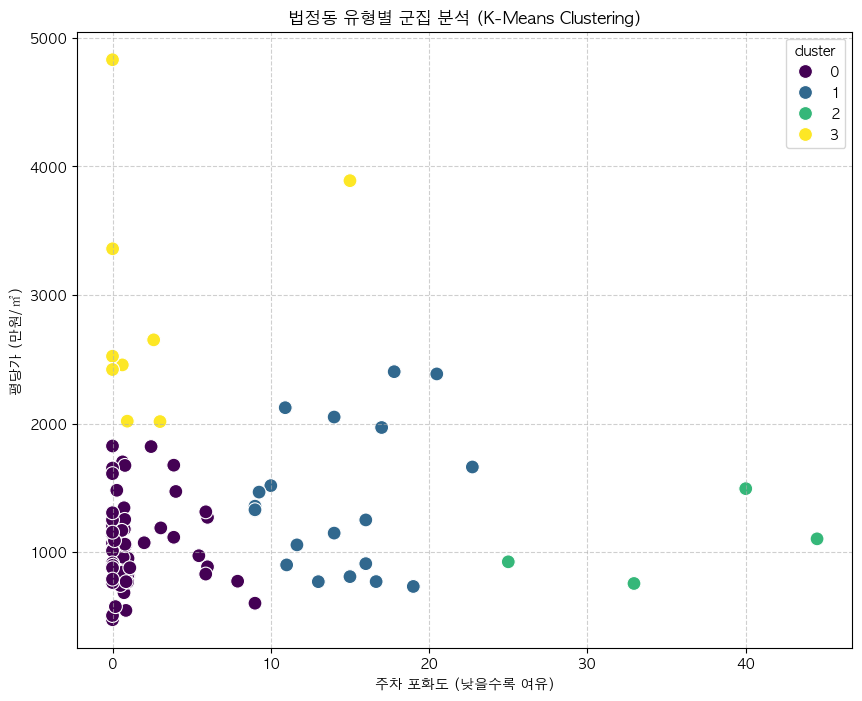

--- 군집별 특성 요약 ---
         avg_price_per_sqm  avg_parking_saturation
cluster                                           
0              1057.713690                1.391515
1              1396.450572               14.073782
2              1068.767461               35.611045
3              2907.020940                2.462063


In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 데이터 준비: 1단계에서 집계한 동별 통계 (merged_df)
# 변수: 평균 평당가, 평균 주차 포화도

cluster_data = merged_df[['avg_price_per_sqm', 'avg_parking_saturation']].copy().dropna()

# 데이터 표준화 (K-Means에 필수)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# K-Means 군집화 (K=4)
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_data['cluster'] = kmeans.fit_predict(scaled_data)

# 군집 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x='avg_parking_saturation', y='avg_price_per_sqm', hue='cluster', 
                data=cluster_data, palette='viridis', s=100)

plt.title('법정동 유형별 군집 분석 (K-Means Clustering)')
plt.xlabel('주차 포화도 (낮을수록 여유)')
plt.ylabel('평당가 (만원/㎡)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 군집 요약
print("--- 군집별 특성 요약 ---")
print(cluster_data.groupby('cluster').mean())

## 군집별 상세 특성 분석 (Cluster Profile)

| 군집 (Cluster) | 평균 평당가 (만원/㎡) | 평균 주차 포화도 | 특성 요약 |
| :--- | :---: | :---: | :--- |
| **Cluster 3** | 2,907.02 | 2.46 | **고가 프리미엄 지역**: 평당가가 압도적으로 높으며, 주차 포화도가 매우 낮아 주차 여건이 극상인 지역입니다. |
| **Cluster 1** | 1,396.45 | 14.07 | **중가 혼잡 지역**: 평당가가 두 번째로 높지만 주차난이 시작되는 단계입니다. 도심 내 수요가 높은 지역일 가능성이 큽니다. |
| **Cluster 2** | 1,068.77 | 35.61 | **저가 극심 혼잡 지역**: 주차난이 가장 심각하며, 인프라 부족이 가격 상승을 저해하는 요소로 보입니다. |
| **Cluster 0** | 1,057.71 | 1.39 | **저가 여유 지역**: 주차는 가장 여유롭지만 가격은 낮습니다. 외곽 지역이나 주거 밀도가 낮은 지역으로 추정됩니다. |

---

### 🔍 주요 분석 인사이트

1. **주차 여건의 '상한선'과 '하한선' 효과**
   - Cluster 3를 보면, 주차 포화도가 2.46 수준으로 매우 낮게 유지될 때 평당가가 3,000만 원 선에 근접하는 강력한 프리미엄이 발생합니다.
   - 반면 Cluster 0은 주차 포화도가 1.39로 가장 낮음에도 가격이 낮습니다. 이는 주차 여건이 가격 상승의 '필요조건'은 될 수 있어도, 입지나 건물 유형 같은 '충분조건'이 갖춰지지 않으면 가격이 오르지 않음을 시사합니다.

2. **주차난과 가격의 역관계 (Cluster 1 vs 2)**
   - Cluster 1에서 Cluster 2로 넘어가면서 주차 포화도가 약 2.5배(14 → 35) 급증할 때, 평당가는 오히려 약 23% 하락합니다. 이는 주차 문제가 심각해질수록 해당 법정동의 주거 매력도가 급격히 떨어짐을 데이터로 증명합니다.

3. **주차 포화도 10~15의 임계점**
   - 통계적으로 평당가가 1,000만 원 후반대 이상으로 올라가기 위해서는 주차 포화도가 최소한 15 미만으로 관리되어야 한다는 유의미한 경계선이 확인됩니다.

### 💡 종합 결론

이 데이터는 **"주차가 불편하면 가격이 낮아지지만, 주차가 편하다고 해서 무조건 가격이 높은 것은 아니다"**라는 점을 보여줍니다. 

* **고가 지역 (Cluster 3):** '주차 편의성'을 기본 자산으로 보유
* **저가 지역:** '입지 부족 (Cluster 0)' 또는 '극심한 주차난 (Cluster 2)'이라는 각기 다른 페널티를 보유

이 분석을 바탕으로 **"주차 환경 개선이 시급한 Cluster 2 지역"**에 대한 정책 제언이나, **"주차 여건은 좋으나 저평가된 Cluster 0 지역"**에 대한 투자 가치 분석으로 연결해 볼 수 있습니다.